In [2]:
# setup
from IPython.core.display import display,HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))
display(HTML(open('rise.css').read()))

# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.5, rc={'figure.figsize':(12, 8)})


# CMPS 2200
# Asymptotic Analysis

Agenda:

- Define Asymptotic Notation
- Introduce
    - Asymptotic Proofs
    - The Limit Theorem
    - L'Hôpital's Rule

## Asymptotic Analysis

### Big Idea

- Ignore machine-dependent constants
- Focus on **growth** of running time
  - What happens in the limit as $n \rightarrow \infty$

$ c_1n + c_2n + c_4 \approx c_5n + c_6n + c_4 $


e.g., consider two algorithms with running times:

- algorithm 1: $$c_1 n + c_2$$
- algorithm 2: $$c_3 n^2 + c_4 n + c_5$$

Depending on the machine-dependent constants, algorithm 2 may sometimes be faster than algorithm 1:

- algorithm 1: $$120 n - 2000$$
- algorithm 2: $$n^2$$

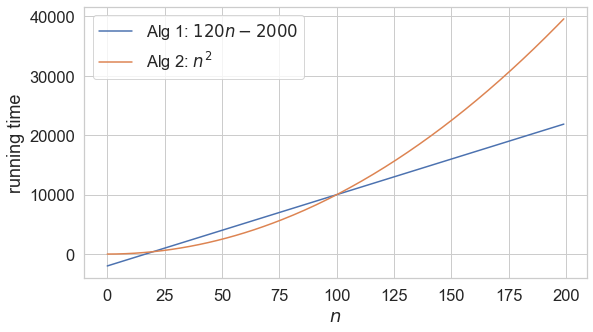

In [9]:
n = np.arange(200)
time1 = 120*n - 2000
time2 = n**2
# plot
plt.figure(figsize=(9,5))
plt.plot(n, time1, label='Alg 1: $120 n - 2000$')
plt.plot(n, time2, label='Alg 2: $n^2$')
plt.xlabel("$n$")
plt.ylabel('running time')
plt.legend()
plt.show()

But, as $n \rightarrow \infty$, there will be a point at which algorithm 2 will be slower, **no matter which machine it is run on**


### Definition: Asymptotic dominance

Function $g(n)$ **asymptotically dominates** function $f(n)$ if **there exist** constants $c$ and $n_0$ such that

$ f(n) \le c \cdot g(n)$ **for all** $n \ge n_0$

<br><br>

e.g., $n^2$ asymptotically dominates $120 n - 2000$


**Proof:**

Find $c$ and $n_0$ such that

$120 n - 2000 \leq c*n^2$  for all $n>n_0$

<br>

Let $c=1$. Find an $n_0$ such that 

$
120 n - 2000 \leq n^2 \\
$
for all $n \ge n_0$

$
\begin{align}
120n - 2000 & \leq n^2 \\
0 & \leq n^2 - 120n + 2000\\
0 & \leq (n-100)(n-20)\\
\end{align}
$


When $n=100$, $120n - 2000 = n^2 $

For all $n \ge 100$, $120n - 2000 \le n^2 $

So, $c=1, n_0=100$ satisfies the definition of asymptotic dominance.

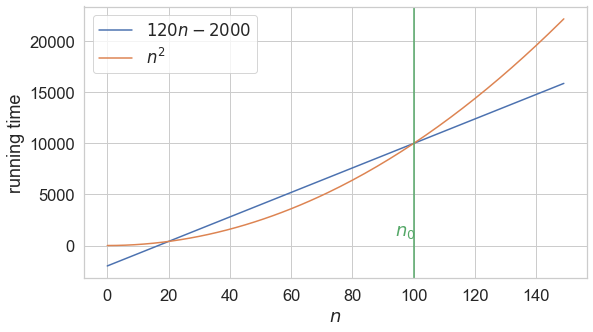

In [8]:
# show n_0
n = np.arange(150)
time1 = 120*n + - 2000
time2 = n*n
# plot
plt.figure(figsize=(9,5))
plt.plot(n, time1, label='$120 n - 2000$')
plt.plot(n, time2, label='$n^2$')
plt.axvline(100, color='g')
plt.text(94,1000,'$n_0$', fontsize=18, color='g')
plt.xlabel("$n$")
plt.ylabel('running time')
plt.legend()
plt.show()

## Asymptotic Notation

$
\begin{align}
& T(n) \in \mathcal{O}(g(n)) \iff g(n) \hbox{ asymptotically dominates } T(n)\\
& T(n) \in \Omega(g(n)) \iff T(n) \hbox{ asymptotically dominates } g(n)\\
& \Theta(g(n)) = \{\mathcal{O} (g(n)) \cap \Omega (g(n))\}\\
& \hbox{where } T \hbox{ is used for "time".}
\end{align}
$


e.g.

$120 n - 2000 \in \mathcal{O}(n^2)$

$10n^3 + 2n^2 - 100 \in \Omega(n^2)$

$14n^2 - 5n +50 \in \Theta(n^2)$

You might see notation such as

$120 n - 2000 = \mathcal{O}(n^2)$

This is technically incorrect since $O(n^2)$ is a family of functions. 

To say that a single function is equal to a family of functions is wrong.

<br>

The following is more acceptable.

$120 n - 2000 \mathrm{~is~} \mathcal{O}(n^2)$

## Definitions

**Big-Oh**

$T(n) \in \mathcal{O}(g(n))$ if **there exist** positive constants $c$ and $n_0$ such that

$ T(n) \le c \cdot g(n)$ **for all** $n \ge n_0$

**Omega**

$T(n) \in \Omega(g(n))$ if **there exist** positive constants $c$ and $n_0$ such that

$ T(n) \ge c \cdot g(n)$ **for all** $n \ge n_0$

**Theta**

$T(n) \in \Theta(g(n))$ if **there exist** positive constants $c_1$, $c_2$, and $n_0$ such that

$c_1*g(n) \le T(n) \le c_2*g(n)$ **for all** $n \ge n_0$

In other words:

$ T(n) \in \mathcal{O}(g(n)) \hbox{ and } T(n) \in \Omega(g(n))$



**Little-oh**

$T(n) \in o(g(n))$ if **for every** positive constant $c$, there exists an $n_0$ such that

$ T(n) \lt c \cdot g(n)$ **for all** $n \ge n_0$

**Little-omega**

$T(n) \in \omega(g(n))$ if **for every** positive constant $c$, there exists an $n_0$ such that

$ T(n) \gt c \cdot g(n)$ **for all** $n \ge n_0$


<br>

**Intuition:**

|$\mathcal{O}~~~$ | $\Omega~~~$ | $\Theta~~~$ | $\mathcal{o}~~~$ | $\omega~~~$ |
|--------------|----------|----------|---------------|----------|
| $\leq~~~$       | $\geq~~~$   | $=~~~$      | $\lt~~~$         | $\gt~~~$    |    

# The Limit Theorem

Since asymptotic analysis is concerned with the rates of growth of function as our input increases, we can use limits to determine and to prove the relationships between functions.



If the following limit exists, we can use it to prove asymptotic relationships:

$$\lim_{n \to \infty} \frac{T(n)}{g(n)}$$

Why? We can use it to analyze the rate of growth of the functions.

If this limit goes to 0, then $g(n)$ must be growing at a faster rate than $T(n)$. In this case, $g(n)$ is asymptotically dominating $T(n)$.

If this limit goes to $\infty$, then $T(n)$ must be growing at a faster rate than $g(n)$. In this case, $T(n)$ is asymptotically dominating $g(n)$

If this limit goes to a constant, then both functions are growing at the same rate.

$$
\lim_{n \to \infty} \frac{T(n)}{g(n)} = c \text{ if } T(n) \in \Theta(g(n))
$$

Why does the limit going to a constant indicate that $T(n) \in \Theta(g(n)$?

Recall that $T(n)$ is $\Theta(g(n))$ if there exists constants $c_1$, $c_2$, and $n_o$ such that:

$c_1*g(n) \le T(n) \le c_2*g(n)$ **for all** $n \ge n_0$

Dividing by $g(n)$ yields:

$c_1 \le \frac{T(n)}{g(n)} \le c_2$ **for** $n \ge n_0$

Since $\frac{T(n)}{g(n)}$ is bounded by two constants, it must be a constant. 

Thus, in the case where $T(n) \in \Theta(g(n))$, the limit goes to a constant.

**The Limit Theorem**

If $\lim_{n \to \infty} \frac{T(n)}{g(n)}$ exists,

$$
\lim_{n \to \infty} \frac{T(n)}{g(n)} =
\begin{cases}
  0  & \text{ if } T(n) \in o(g(n)) \text{ ...also } \mathcal{O}(g(n))\\
  c  & \text{ if } T(n) \in \Theta(g(n)) \text{ ...also } \mathcal{O}(g(n)) \text{, } \Omega(g(n))\\
  \infty  & \text{ if } T(n) \in \omega(g(n)) \text{ ...also } \Omega(g(n))\\
\end{cases}
$$

## Using the Limit Theorem



Ex: Prove that $an^2 + bn + c \in \Theta(n^2)$

$$ \lim_{n \to \infty} \frac{an^2 + bn + c}{n^2} $$

$$ = \lim_{n \to \infty} a + \lim_{n \to \infty} \frac{b}{n} + \lim_{n \to \infty} \frac{c}{n^2} $$
$$ = a $$

Since the limit goes to a constant, $an^2 + bn + c \in \Theta(n^2)$

Ex: Prove that $an^2 + bn + c \in \mathcal{O}(n^3)$

$$ \lim_{n \to \infty} \frac{an^2 + bn + c}{n^3} $$

$$ = \lim_{n \to \infty} \frac{a}{n} + \lim_{n \to \infty} \frac{b}{n^2} + \lim_{n \to \infty} \frac{c}{n^3} $$
$$ = 0 $$

Since the limit goes to a $0$, $an^2 + bn + c \in \mathcal{O}(n^3)$

Ex: Prove that $an^2 + bn + c \in \Omega(n)$

$$ \lim_{n \to \infty} \frac{an^2 + bn + c}{n} $$

$$ = \lim_{n \to \infty} an + \lim_{n \to \infty} \frac{b} + \lim_{n \to \infty} \frac{c}{n} $$
$$ = \infty $$

Since the limit goes to a $\infty$, $an^2 + bn + c \in \Omega(n)$

## Simplifying Limits, L'Hôpital's Rule



Not all limits are so easy to evaluate, sometimes we want to simply the numerator and denominator in order to evaluate the limit.

To do so, we can use L'Hôpital's Rule which states:

If $\lim_{n \to \infty} \frac{f(n)}{g(n)}$ exists,

$$\lim_{n \to \infty} \frac{f(n)}{g(n)} = \lim_{n \to \infty} \frac{f'(n)}{g'(n)}$$

Since the derivatives of functions are often simpler than the original functions, this rule can help simplify the limit for evaluation.

Ex. Is $\ln n \in \Omega(n)$?

$\lim_{n \to \infty} \frac{\ln n}{n} = \lim_{n \to \infty} \frac{1/n}{1} = \lim_{n \to \infty} \frac{1}{n} = 0$

$\ln n \notin \Omega(n)$

$\ln n \in \mathcal{O}(n)$

## Coming up

Next we will introduce a parallel algorithms, a fundamental throughline in this course!